# Import relevant libraries and load the data

In [1]:
!pip install --upgrade --no-cache-dir gdown

In [2]:
# training dataset
! gdown --id 18HNJqdLWre9uMrrpN9LD55UMvKltWCve

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18HNJqdLWre9uMrrpN9LD55UMvKltWCve
To: /content/train_data.csv
100% 33.3M/33.3M [00:00<00:00, 73.5MB/s]


In [3]:
# testing dataset
! gdown --id 1lf4mO5e85wM8Y7cFy4yKhGc5XFgpfGvd

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lf4mO5e85wM8Y7cFy4yKhGc5XFgpfGvd
To: /content/test_data.csv
100% 32.5M/32.5M [00:00<00:00, 53.4MB/s]


In [4]:
!pip install nltk

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load the dataset

In [7]:
df = pd.read_csv('/content/train_data.csv')
df.head()

,0,1
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25000 non-null  object
 1   1       25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


,count
1,
0,12500
1,12500


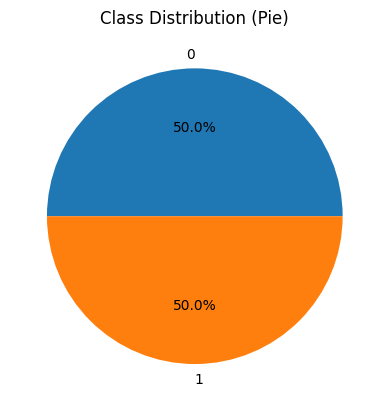

In [9]:
label_counts = df["1"].value_counts().sort_index()
display(label_counts)

plt.figure()
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%')
plt.title("Class Distribution (Pie)")
plt.show()

# Preprocess the text

In [10]:
df['0'][0]

'This film is absolutely awful, but nevertheless, it can be hilarious at times, although this humor is entirely unintentional.<br /><br />The plot was beyond ridiculous. I don\'t even think a 2 year-old would be convinced by the ludicrous idiocy that the film-makers tried to slap together into a story. However, on the positive side, some of the horrifically inane plot twists provide a great deal of humor. For example, "Wow, Lady Hogbottom has a giant missile hidden in her back yard!" It gets worse (and even funnier), but I\'ll spare you.<br /><br />The acting is generally laughable. Most of the kids\' roles are sort of cute, but not very believable. On the other hand, Annie is pretty awful all-around. The adults don\'t take their roles seriously at all, but this is largely a good thing. If they\'d tried to be believable, the film would\'ve been even worse. Which is difficult to imagine.<br /><br />Once you get past the overall crappiness of the movie, there are actually a few standout 

In [11]:
# remove all numbers with or without letters attached to them
alphanumeric = lambda x: re.sub(r'\w*\d\w*|\d+', ' ', x)

remove_html = lambda x: re.sub(r'<.*?>', ' ', x)

# replace punctuation with white space and convert all strings to lowercase
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

df['0'] = df['0'].map(alphanumeric).map(remove_html).map(punc_lower).map(remove_n).map(remove_non_ascii)
df['0'][0]

'this film is absolutely awful  but nevertheless  it can be hilarious at times  although this humor is entirely unintentional   the plot was beyond ridiculous  i don t even think a   year old would be convinced by the ludicrous idiocy that the film makers tried to slap together into a story  however  on the positive side  some of the horrifically inane plot twists provide a great deal of humor  for example   wow  lady hogbottom has a giant missile hidden in her back yard   it gets worse  and even funnier   but i ll spare you   the acting is generally laughable  most of the kids  roles are sort of cute  but not very believable  on the other hand  annie is pretty awful all around  the adults don t take their roles seriously at all  but this is largely a good thing  if they d tried to be believable  the film would ve been even worse  which is difficult to imagine   once you get past the overall crappiness of the movie  there are actually a few standout moments of almost not crappiness  th

In [12]:
stop = stopwords.words('english')
df['0'] = df['0'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['0'][0]

'film absolutely awful nevertheless hilarious times although humor entirely unintentional plot beyond ridiculous even think year old would convinced ludicrous idiocy film makers tried slap together story however positive side horrifically inane plot twists provide great deal humor example wow lady hogbottom giant missile hidden back yard gets worse even funnier spare acting generally laughable kids roles sort cute believable hand annie pretty awful around adults take roles seriously largely good thing tried believable film would even worse difficult imagine get past overall crappiness movie actually standout moments almost crappiness scene lady hogbottom son runs away maid surprisingly hilarious though annoying letdown get caught police butler character minor ray sunlight almost never quite pierces gloom watching movie actually caused physical pain nevertheless redeeming parts made almost watchable without beginning hemorrhage internally judged good parts alone movie would unfortunatel

In [13]:
df.head()

,0,1
0,film absolutely awful nevertheless hilarious t...,0
1,well since seeing part honestly say never made...,0
2,got see film preview dazzled typical romantic ...,1
3,adaptation positively butchers classic beloved...,0
4,r zone awful movie simple seems tried make mov...,0


#Import relevant packages for modelling

In [14]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

#Model select and start training

In [15]:
X = df['0']
y = df['1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv1 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)


lr = LogisticRegression()
lr.fit(X_train_cv1, y_train)
print('Logistic Regression model trained')

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_cv1, y_train)
print('KNN model trained')

bnb = BernoulliNB()
bnb.fit(X_train_cv1, y_train)
print('Bernoulli Naive Bayes model trained')

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)
print('Multinomial Naive Bayes model trained')

svm_model = LinearSVC()
svm_model.fit(X_train_cv1, y_train)
print('Linear SVC model trained')

randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train_cv1, y_train)
print('Random Forest model trained')

print("All models trained")

Logistic Regression model trained
KNN model trained
Bernoulli Naive Bayes model trained
Multinomial Naive Bayes model trained
Linear SVC model trained
Random Forest model trained
All models trained


In [16]:
# save vectorizer
import joblib
joblib.dump(cv1, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [17]:
f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test),
                            f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                            f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]}

accuracy_score_data = {'Accuracy Score':[accuracy_score(lr.predict(X_test_cv1), y_test), accuracy_score(knn.predict(X_test_cv1), y_test),
                            accuracy_score(bnb.predict(X_test_cv1), y_test), accuracy_score(mnb.predict(X_test_cv1), y_test),
                            accuracy_score(svm_model.predict(X_test_cv1), y_test), accuracy_score(randomforest.predict(X_test_cv1), y_test)]}

precision_score_data = {'Precision Score':[precision_score(lr.predict(X_test_cv1), y_test), precision_score(knn.predict(X_test_cv1), y_test),
                            precision_score(bnb.predict(X_test_cv1), y_test), precision_score(mnb.predict(X_test_cv1), y_test),
                            precision_score(svm_model.predict(X_test_cv1), y_test), precision_score(randomforest.predict(X_test_cv1), y_test)]}

recall_score_data = {'Recall Score':[recall_score(lr.predict(X_test_cv1), y_test), recall_score(knn.predict(X_test_cv1), y_test),
                            recall_score(bnb.predict(X_test_cv1), y_test), recall_score(mnb.predict(X_test_cv1), y_test),
                            recall_score(svm_model.predict(X_test_cv1), y_test), recall_score(randomforest.predict(X_test_cv1), y_test)]}

df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])
df_accuracy = pd.DataFrame(accuracy_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])
df_precision = pd.DataFrame(precision_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])
df_recall = pd.DataFrame(recall_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])

In [18]:
result = pd.concat([df_accuracy, df_precision, df_recall, df_f1], axis=1)
print("\nModel Performance Summary:")
result


Model Performance Summary:


,Accuracy Score,Precision Score,Recall Score,F1 Score
Log Regression,0.8910,0.912586,0.872678,0.892186
KNN,0.7836,0.851882,0.746189,0.795540
BernoulliNB,0.8472,0.802509,0.877822,0.838478
MultinomialNB,0.8720,0.876568,0.866054,0.871279
SVM,0.8862,0.902873,0.871484,0.886901
Random Forest,0.8486,0.854310,0.841707,0.847961


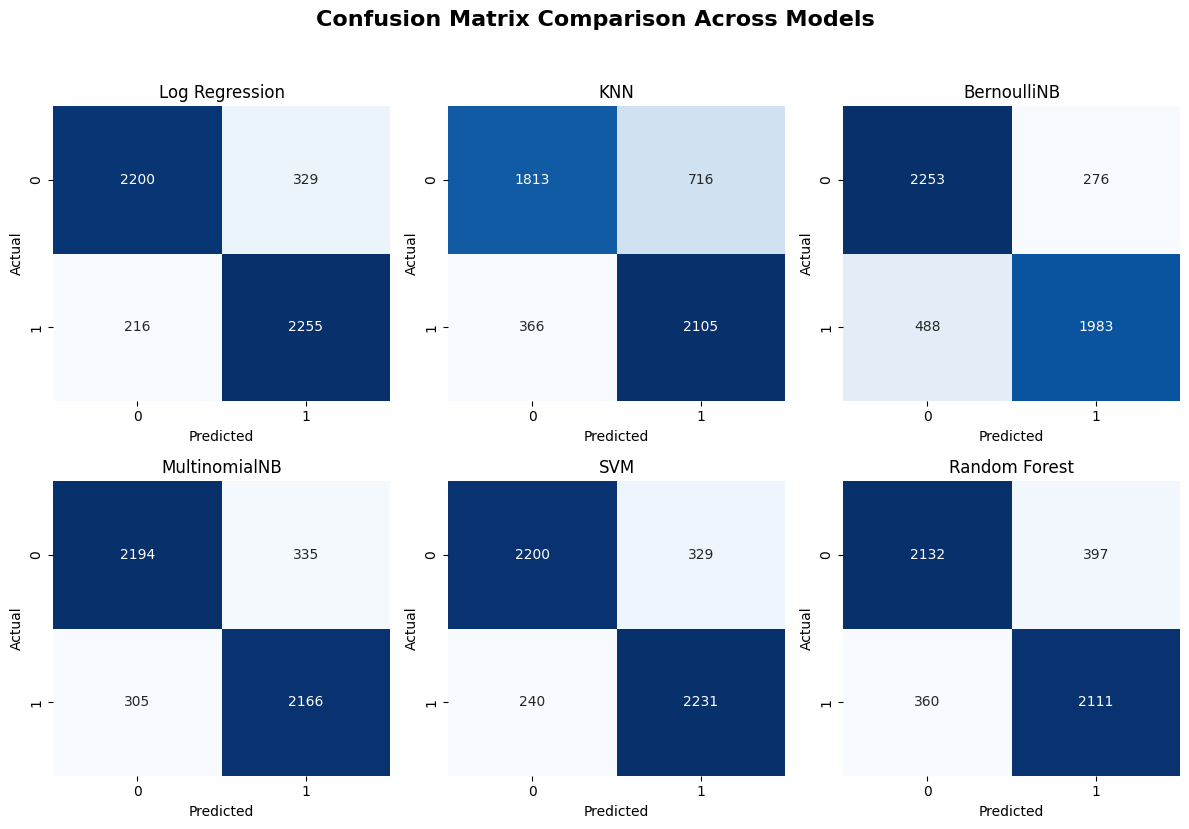

In [19]:
models = {
    'Log Regression': lr,
    'KNN': knn,
    'BernoulliNB': bnb,
    'MultinomialNB': mnb,
    'SVM': svm_model,
    'Random Forest': randomforest
}

plt.figure(figsize=(12, 8))
for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_cv1)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 3, idx + 1)  # 2 rows, 3 columns grid
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.suptitle("Confusion Matrix Comparison Across Models", fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

#With optimized parameters

In [20]:
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200]
}
lr_opt = LogisticRegression()
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_cv1, y_train)
lr_opt = lr_grid.best_estimator_
print("Best LR Params:", lr_grid.best_params_)

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn_opt = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_cv1, y_train)
knn_opt = knn_grid.best_estimator_
print("Best KNN Params:", knn_grid.best_params_)

bnb_params = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5, 1.0]
}
bnb_opt = BernoulliNB()
bnb_grid = GridSearchCV(bnb, bnb_params, cv=5, scoring='accuracy', n_jobs=-1)
bnb_grid.fit(X_train_cv1, y_train)
bnb_opt = bnb_grid.best_estimator_
print("Best BernoulliNB Params:", bnb_grid.best_params_)

mnb_params = {
    'alpha': [0.1, 0.5, 1.0]
}
mnb_opt = MultinomialNB()
mnb_grid = GridSearchCV(mnb, mnb_params, cv=5, scoring='accuracy', n_jobs=-1)
mnb_grid.fit(X_train_cv1, y_train)
mnb_opt = mnb_grid.best_estimator_
print("Best MultinomialNB Params:", mnb_grid.best_params_)

svm_params = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}
svm_model_opt = LinearSVC()
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_cv1, y_train)
svm_model_opt = svm_grid.best_estimator_
print("Best LinearSVC Params:", svm_grid.best_params_)

print("All models trained with optimized parameters.")


Best LR Params: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best KNN Params: {'n_neighbors': 7, 'weights': 'distance'}
Best BernoulliNB Params: {'alpha': 0.5, 'binarize': 0.0}
Best MultinomialNB Params: {'alpha': 1.0}
Best LinearSVC Params: {'C': 1, 'max_iter': 1000}
All models trained with optimized parameters.


In [21]:
f1_score_data = {'F1 Score':[f1_score(lr_opt.predict(X_test_cv1), y_test), f1_score(knn_opt.predict(X_test_cv1), y_test),
                            f1_score(bnb_opt.predict(X_test_cv1), y_test), f1_score(mnb_opt.predict(X_test_cv1), y_test),
                            f1_score(svm_model_opt.predict(X_test_cv1), y_test)]}

accuracy_score_data = {'Accuracy Score':[accuracy_score(lr_opt.predict(X_test_cv1), y_test), accuracy_score(knn_opt.predict(X_test_cv1), y_test),
                            accuracy_score(bnb_opt.predict(X_test_cv1), y_test), accuracy_score(mnb_opt.predict(X_test_cv1), y_test),
                            accuracy_score(svm_model_opt.predict(X_test_cv1), y_test)]}

precision_score_data = {'Precision Score':[precision_score(lr_opt.predict(X_test_cv1), y_test), precision_score(knn_opt.predict(X_test_cv1), y_test),
                            precision_score(bnb_opt.predict(X_test_cv1), y_test), precision_score(mnb_opt.predict(X_test_cv1), y_test),
                            precision_score(svm_model_opt.predict(X_test_cv1), y_test)]}

recall_score_data = {'Recall Score':[recall_score(lr_opt.predict(X_test_cv1), y_test), recall_score(knn_opt.predict(X_test_cv1), y_test),
                            recall_score(bnb_opt.predict(X_test_cv1), y_test), recall_score(mnb_opt.predict(X_test_cv1), y_test),
                            recall_score(svm_model_opt.predict(X_test_cv1), y_test)]}

df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM'])
df_accuracy = pd.DataFrame(accuracy_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM'])
df_precision = pd.DataFrame(precision_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM'])
df_recall = pd.DataFrame(recall_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM'])

In [22]:
result = pd.concat([df_accuracy, df_precision, df_recall, df_f1], axis=1)
print("\nModel Performance Summary After Optimize:")
result


Model Performance Summary After Optimize:


,Accuracy Score,Precision Score,Recall Score,F1 Score
Log Regression,0.8914,0.906920,0.877447,0.891940
KNN,0.7940,0.861594,0.755769,0.805219
BernoulliNB,0.8470,0.807365,0.873468,0.839117
MultinomialNB,0.8720,0.876568,0.866054,0.871279
SVM,0.8862,0.902873,0.871484,0.886901


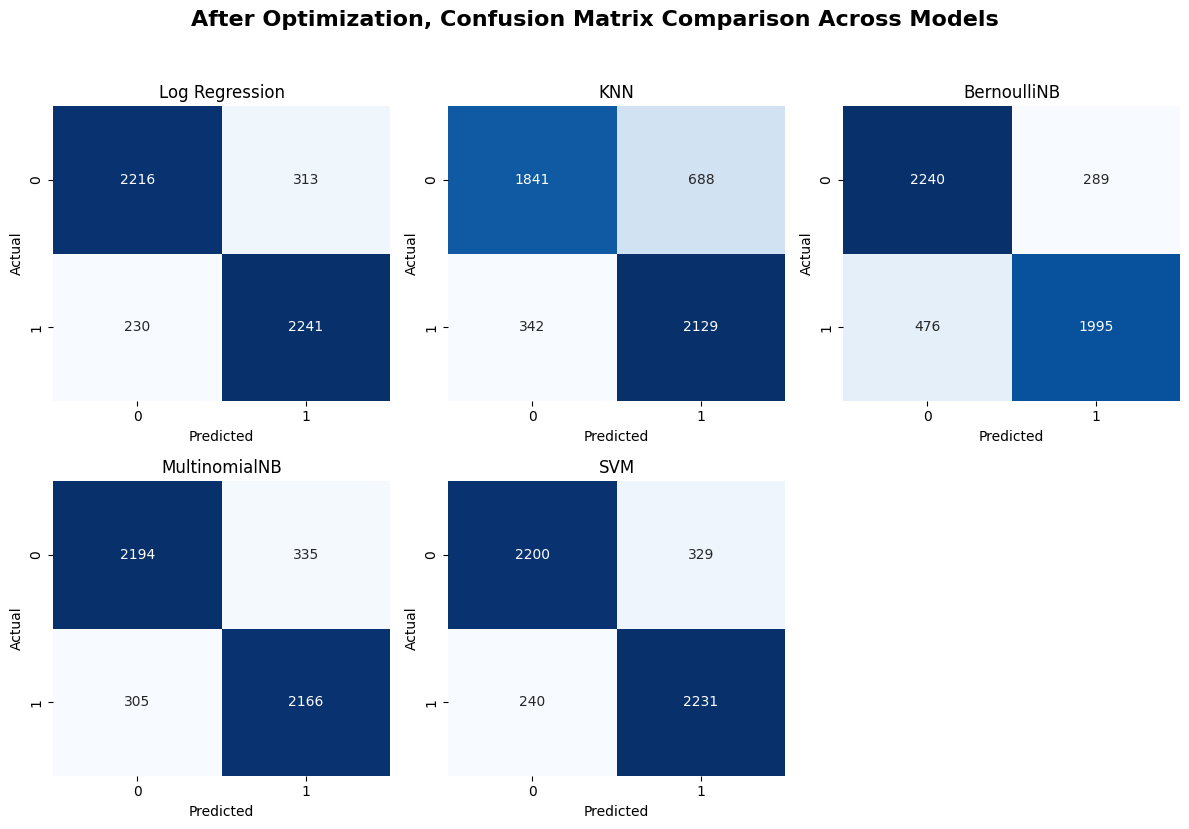

In [23]:
models = {
    'Log Regression': lr_opt,
    'KNN': knn_opt,
    'BernoulliNB': bnb_opt,
    'MultinomialNB': mnb_opt,
    'SVM': svm_model_opt
}

plt.figure(figsize=(12, 8))
for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_cv1)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 3, idx + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.suptitle("After Optimization, Confusion Matrix Comparison Across Models", fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

#After optimization, Logistic Regression provides the highest balanced performance between precision and recall (F1 score), so we will save it and use it for testing.

In [24]:
import pickle

with open("optimized_logistic_regression_model.pkl", "wb") as file:
    pickle.dump(lr_opt, file)

In [25]:
lr = joblib.load("/content/optimized_logistic_regression_model.pkl")
cv1 = joblib.load("/content/tfidf_vectorizer.pkl")

test_df = pd.read_csv("/content/test_data.csv")
test_df.columns = ["Review", "Actual"]  # Rename columns for clarity

# Preprocessing data
alphanumeric = lambda x: re.sub(r'\w*\d\w*|\d+', ' ', x)
remove_html = lambda x: re.sub(r'<.*?>', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]', r' ', x)
stop = stopwords.words('english')

def preprocess_text(text):
    text = alphanumeric(text)
    text = remove_html(text)
    text = punc_lower(text)
    text = remove_n(text)
    text = remove_non_ascii(text)
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

# Apply Preprocessing to Test Data
test_df['Cleaned_Review'] = test_df['Review'].apply(preprocess_text)

X_test_new = cv1.transform(test_df['Cleaned_Review'])

test_df['Predicted'] = lr.predict(X_test_new)


test_df[['Review', 'Actual', 'Predicted']].head(10)

,Review,Actual,Predicted
0,I did not enjoy the film Eraser whatsoever. It...,0,0
1,Be very afraid of anyone who likes this film. ...,0,0
2,The 3rd and last big screen spin off from the ...,0,0
3,Barely three and a half years after just scrap...,1,0
4,I'm a big fan of the demonic puppets. Looking ...,0,0
5,"Well, I'll begin with this: I love horror-movi...",0,0
6,I think this film version of NORTHANGER ABBEY ...,1,1
7,I saw this version of Hamlet on television man...,1,1
8,This Asterix is very similar to modern Disney ...,0,0
9,A very positive message for our youth is shown...,1,1


# Bonus part

# Install and import necessary libraries

In [26]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next r

In [28]:
MAX_VOCAB = 30000
MAX_LEN = 200

X_train_texts = X_train.tolist()
X_test_texts = X_test.tolist()

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

Xtr = tokenizer.texts_to_sequences(X_train_texts)
Xts = tokenizer.texts_to_sequences(X_test_texts)
Xtr = pad_sequences(Xtr, maxlen=MAX_LEN, padding='post', truncating='post')
Xts = pad_sequences(Xts, maxlen=MAX_LEN, padding='post', truncating='post')

# Label Encoding

In [29]:
classes = sorted(df['1'].unique())
class_to_idx = {c:i for i,c in enumerate(classes)}
ytr = np.array([class_to_idx[y] for y in y_train])
yts = np.array([class_to_idx[y] for y in y_test])
NUM_CLASSES = len(classes)

# Build Keras BiLSTM model

In [30]:
model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
# Train
history = model.fit(
    Xtr, ytr,
    validation_split=0.1,
    epochs=5,
    batch_size=64,
    verbose=1
)

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 99s 336ms/step - accuracy: 0.6787 - loss: 0.5609 - val_accuracy: 0.8505 - val_loss: 0.4079
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 91s 321ms/step - accuracy: 0.9353 - loss: 0.1888 - val_accuracy: 0.8725 - val_loss: 0.3379
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 91s 322ms/step - accuracy: 0.9646 - loss: 0.1061 - val_accuracy: 0.8655 - val_loss: 0.3928
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 90s 320ms/step - accuracy: 0.9849 - loss: 0.0487 - val_accuracy: 0.8600 - val_loss: 0.4440
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 90s 319ms/step - accuracy: 0.9914 - loss: 0.0309 - val_accuracy: 0.8595 - val_loss: 0.5908


In [32]:
# Evaluate
ydl_pred = model.predict(Xts, verbose=0).argmax(axis=1)
dl_acc = accuracy_score(yts, ydl_pred)
dl_prec, dl_rec, dl_f1, _ = precision_recall_fscore_support(yts, ydl_pred, average='weighted', zero_division=0)

dl_row = {
    "Model": "Keras_BiLSTM",
    "Accuracy": dl_acc,
    "Precision": dl_prec,
    "Recall": dl_rec,
    "F1-score": dl_f1
}

print("\nDL Results:")
display(pd.DataFrame([dl_row]))


DL Results:


,Model,Accuracy,Precision,Recall,F1-score
0,Keras_BiLSTM,0.8636,0.864312,0.8636,0.86349


# So, for this particular dataset and problem, Logistic Regression is still the better choice in terms of overall performance and simplicity.

# Demo script

In [33]:
import re
import string
import joblib
from nltk.corpus import stopwords


lr = joblib.load("/content/optimized_logistic_regression_model.pkl")
cv1 = joblib.load("/content/tfidf_vectorizer.pkl")


alphanumeric = lambda x: re.sub(r'\w*\d\w*|\d+', ' ', x)
remove_html = lambda x: re.sub(r'<.*?>', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]', r' ', x)
stop = stopwords.words('english')

def preprocess_text(text):
    text = alphanumeric(text)
    text = remove_html(text)
    text = punc_lower(text)
    text = remove_n(text)
    text = remove_non_ascii(text)
    text = ' '.join([word for word in text.split() if word not in stop])
    return text


review = input("Enter a movie review :")

cleaned_review = preprocess_text(review)
review_vector = cv1.transform([cleaned_review])
prediction = lr.predict(review_vector)[0]

label = "Bad Review" if prediction == 0 else "Good Review"
print(f"\nPrediction: {label}")

Enter a movie review :This Movie IS Wonderful

Prediction: Good Review
